In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [2]:
### Reading a netcdf file

ds = nc.Dataset('RRRAG4_Greenland_1993_2013_01_age_grid.nc')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Gridded age structure of the Greenland Ice Sheet
    original file name: Greenland_age_grid.nc
    version: 1.2
    citation: MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120
    date generated: 01-Apr-2015 08:59:30
    point of contact: Joseph MacGregor, joemac@ig.utexas.edu
    grid projection: EPSG:3413
    dimensions(sizes): number of grid points in y-direction(2675), number of grid points in x-direction(1479), number of isochrones(4), number of vertical layers(25)
    variables(dimensions): float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction), float64 depth_iso_uncert(number of isochrones, number of gri

In [3]:
print(ds.__dict__)

{'title': 'Gridded age structure of the Greenland Ice Sheet', 'original file name': 'Greenland_age_grid.nc', 'version': '1.2', 'citation': 'MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120', 'date generated': '01-Apr-2015 08:59:30', 'point of contact': 'Joseph MacGregor, joemac@ig.utexas.edu', 'grid projection': 'EPSG:3413'}


In [4]:
### Look at what dimensions are available

for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in y-direction', size = 2675
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in x-direction', size = 1479
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of isochrones', size = 4
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of vertical layers', size = 25


In [5]:
### Look at what variables are available

for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depths of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso_uncert(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depth uncertainty of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 age_norm(number of vertical layers, number of grid points in x-direction, number of grid points in y-direction)
    description: age at ice-thickness-normalized depths, evenly spaced vertically
    units: yr
unlimited dimensions: 
current shape = (25, 1479, 2675)
filling on, defaul

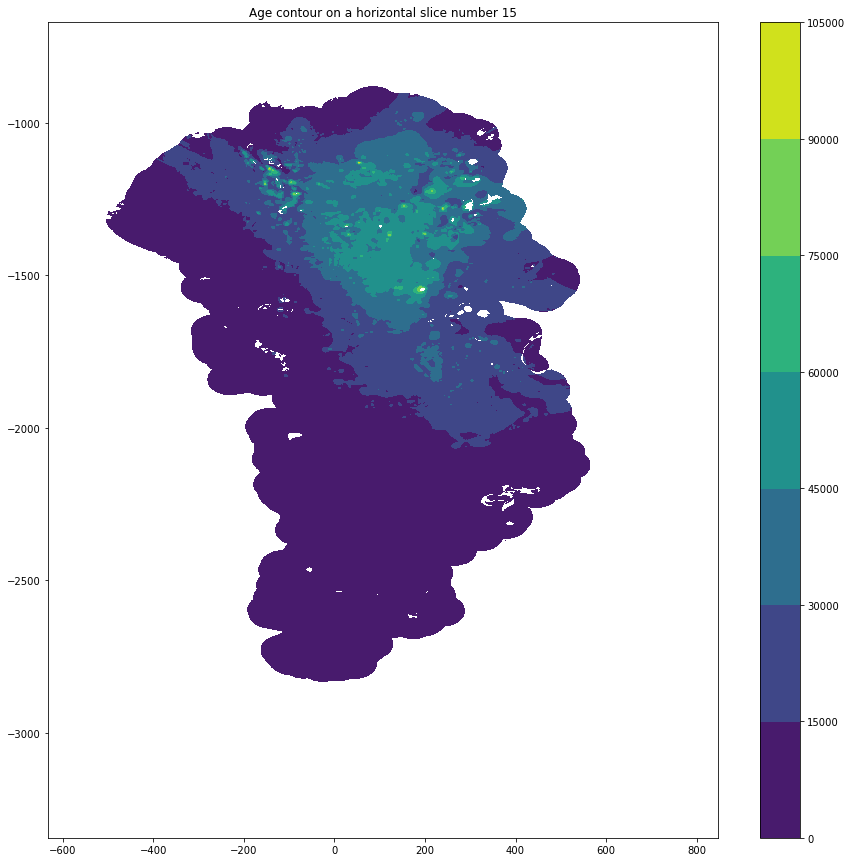

In [6]:
### Plot age
age_layer_number = 15
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
age = ds.variables['age_norm'][:][age_layer_number,:,:]

plt.rcParams['figure.figsize'] = [15, 15]
plt.contourf(x,y,age.T)
plt.colorbar()
plt.title("Age contour on a horizontal slice number " + str(age_layer_number))
plt.show()

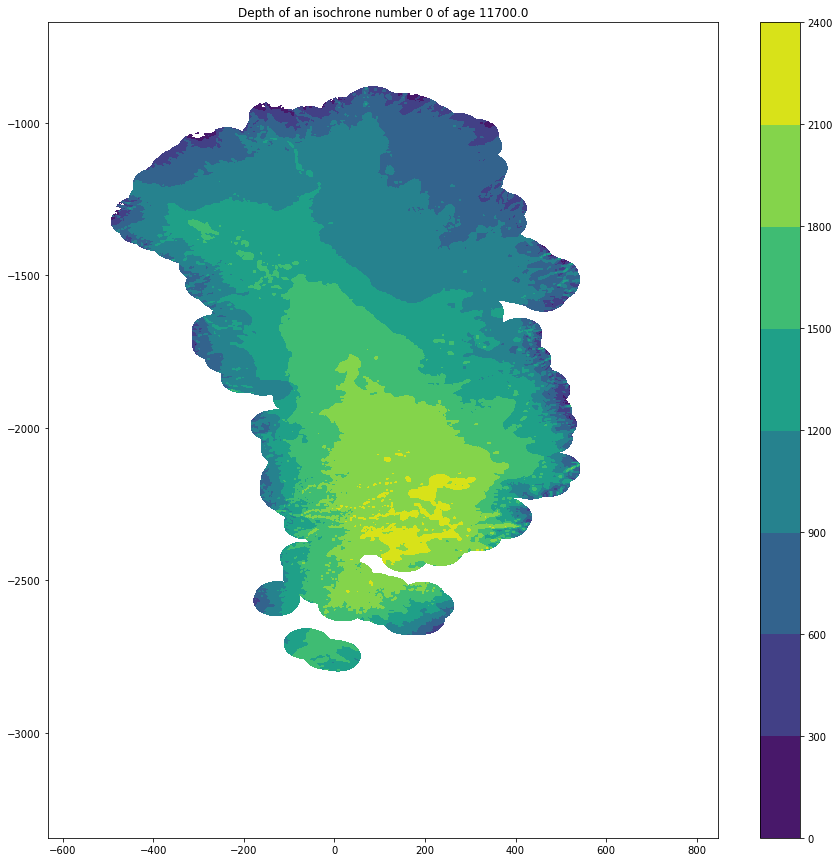

In [7]:
### Depth of an iscohrone provided in the data
isochrone_number = 0
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso = ds.variables['depth_iso'][:][isochrone_number,:,:]
age_iso = ds.variables['age_iso'][:][isochrone_number]

plt.contourf(x,y,depth_iso.T)
plt.colorbar()
plt.title("Depth of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

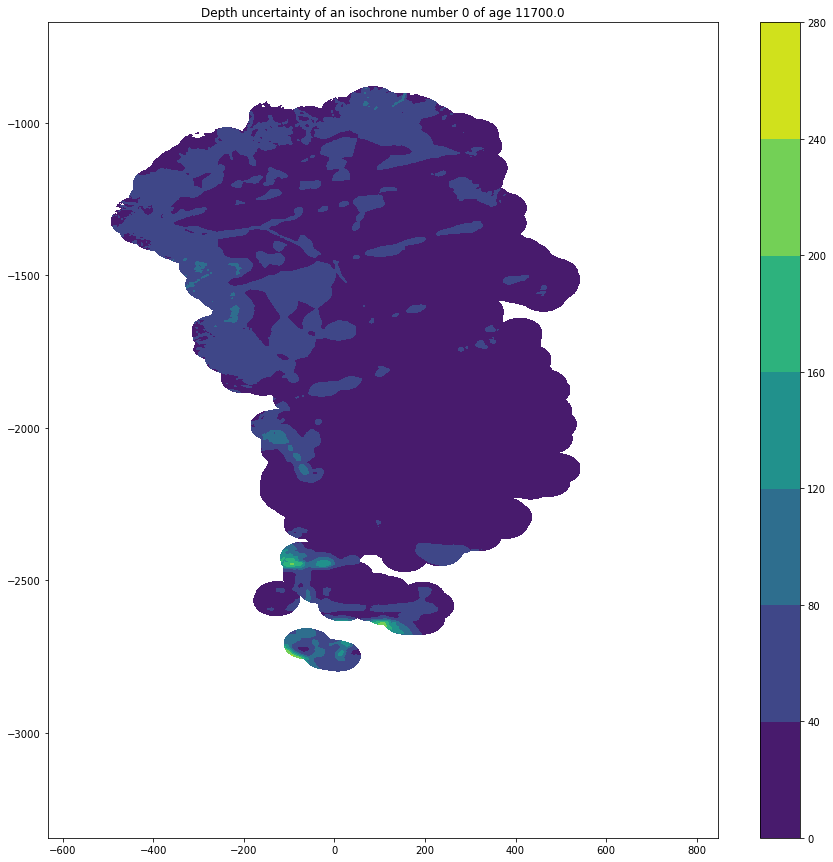

In [8]:
### Depth uncertainty of an iscohrone provided in the data
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso_uncert = ds.variables['depth_iso_uncert'][:][isochrone_number,:,:]

plt.contourf(x,y,depth_iso_uncert.T)
plt.colorbar()
plt.title("Depth uncertainty of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

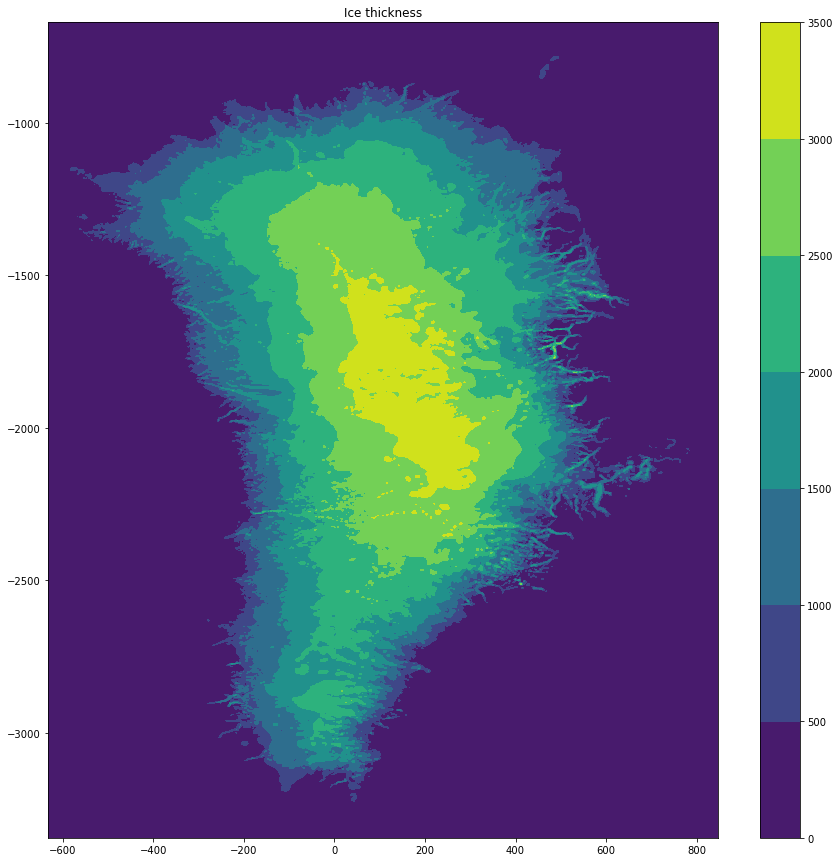

In [9]:
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
h = ds.variables['thick'][:][:,:]

plt.contourf(x,y,h.T)
plt.colorbar()
plt.title("Ice thickness")
plt.show()

In [56]:
def interpolate_and_plot(x,y,z,nx,ny):
    xi = np.linspace(np.min(x), np.max(x), nx)
    yi = np.linspace(np.min(y), np.max(y), ny)

    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)

    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    plt.contourf(xi, yi, zi, levels=10)
    plt.scatter(x,y)
    plt.colorbar()
    return None

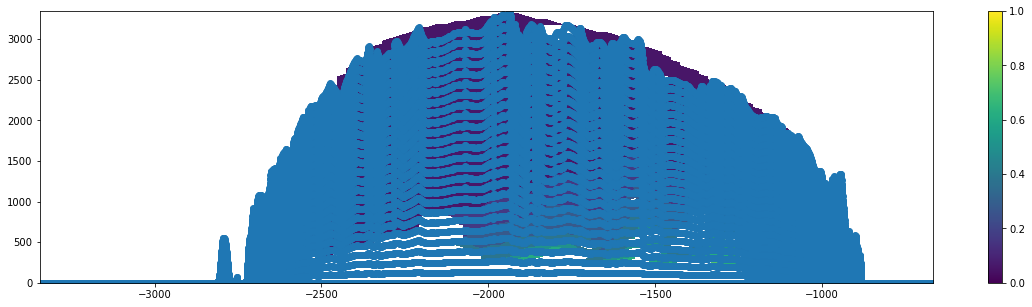

In [57]:
plt.rcParams['figure.figsize'] = [20,5]


### Plot on a grid where the height of the ice sheet is the y-axis
y_array = np.tile(y, (25, 1)) 
z_array = np.zeros((25, y.shape[0]))
x_index = np.where(x==200)

age_slice_north_south = ds.variables['age_norm'][:][::-1,x_index[0],:]

for i in range(y.shape[0]):
    for j in range(25):
        z_array[j,i] = h[x_index,i]/24*j 


interpolate_and_plot(y_array.reshape(-1),z_array.reshape(-1),age_slice_north_south.reshape(-1),100,100)

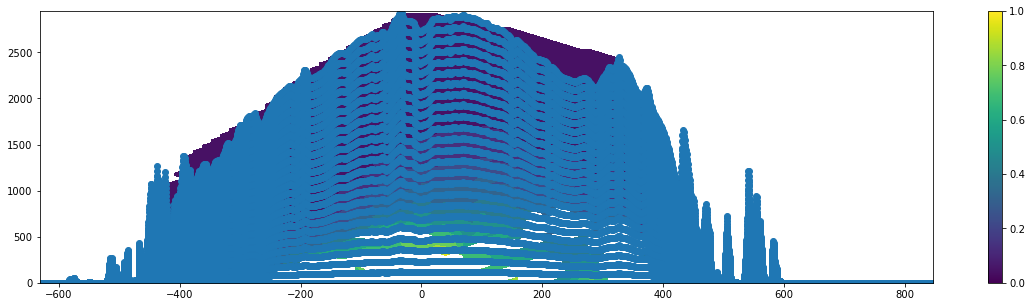

In [58]:
### Plot isochrones on a slice running west to east, but scaling according to height in the y-axis
y_index = np.where(y==-1400)
x_array = np.tile(x, (25, 1)) 
z_array = np.zeros((25, x.shape[0]))
age_slice_west_east = ds.variables['age_norm'][:][:,:,y_index[0]][::-1]

for i in range(x.shape[0]):
    for j in range(25):
        z_array[j,i] = h[i,y_index]/24*j 

interpolate_and_plot(x_array.reshape(-1), z_array.reshape(-1), age_slice_west_east.reshape(-1), 100, 100)


In [59]:
ds2 = nc.Dataset('sico_out/v5_grl20_ss25ka/v5_grl20_ss25ka0003.nc')
print(ds2)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Time-slice output no. 0003 of simulation v5_grl20_ss25ka
    institution: Institute of Low Temperature Science, Hokkaido University, Sapporo, Japan
    source: SICOPOLIS Version 5.1
    history: 2021-02-05 03:12:58 +00:00 - Data produced
    references: http://www.sicopolis.net/
    dimensions(sizes): x(85), y(145), zeta_c(81), zeta_t(11), zeta_r(41)
    variables(dimensions): int8 mapping(), float32 time(), float32 delta_ts(), float32 z_sl(), float32 V_tot(), float32 V_af(), float32 A_grounded(), float32 A_floating(), float32 x(x), float32 y(y), float32 sigma_level_c(zeta_c), float32 sigma_level_t(zeta_t), float32 sigma_level_r(zeta_r), float32 lon(y, x), float32 lat(y, x), float32 lambda(y, x), float32 phi(y, x), float32 temp_maat(y, x), float32 temp_s(y, x), float32 prec(y, x), float32 snowfall(y, x), float32 rainfall(y, x), float32 pdd(y, x), float32 as_perp(y, x), float32 as

In [60]:
### Look at what variables are available

for var in ds2.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int8 mapping()
    grid_mapping_name: polar_stereographic
    semi_major_axis: 6378137.0
    inverse_flattening: 298.257223563
    latitude_of_projection_origin: 90.0
    standard_parallel: 70.0
    straight_vertical_longitude_from_pole: -45.0
    false_easting: 0.0
    false_northing: 0.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -127 ignored
<class 'netCDF4._netCDF4.Variable'>
float32 time()
    units: a
    standard_name: time
    long_name: Time
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 delta_ts()
    units: degC
    standard_name: surface_temperature_anomaly
    long_name: Surface temperature anomaly
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 z_sl()
    units: m
    standard_name: global_average_sea_level_c

In [61]:
x = ds2.variables['x'][:]
y = ds2.variables['y'][:]
age_c = ds2.variables['age_c'][:]
age_t = ds2.variables['age_t'][:]
H_cold = ds2.variables['H_cold'][:]
H_temp = ds2.variables['H_temp'][:]
H = ds2.variables['H'][:]
zeta_c = age_c.shape[0]
zeta_t = age_t.shape[0]
zb = ds2.variables['zb'][:]

np.sort(zb)

masked_array(
  data=[[-9999.     , -9999.     , -9999.     , ..., -1741.2894 ,
         -1733.4991 , -1668.0815 ],
        [-9999.     , -9999.     , -9999.     , ..., -1738.0237 ,
         -1674.9993 , -1672.8157 ],
        [-9999.     , -9999.     , -9999.     , ..., -1436.7292 ,
         -1386.3387 , -1380.3414 ],
        ...,
        [-9999.     , -9999.     , -9999.     , ...,  -505.7034 ,
          -464.47665,  -424.68552],
        [-9999.     , -9999.     , -9999.     , ...,  -780.7883 ,
          -760.503  ,  -675.48706],
        [-9999.     , -9999.     , -9999.     , ..., -1026.191  ,
          -912.7971 ,  -875.1078 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

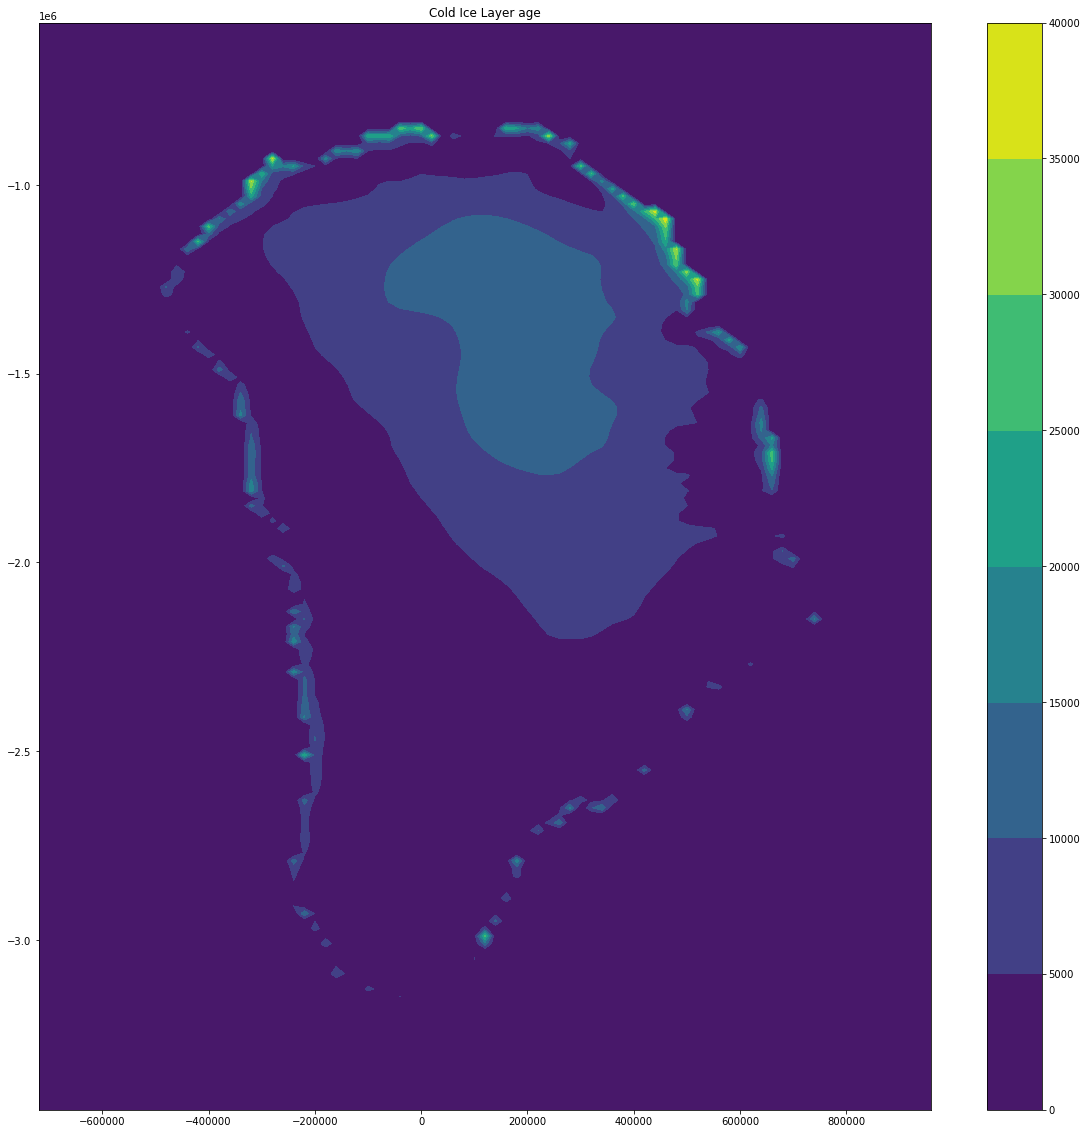

In [62]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.contourf(x,y,age_c[60,:,:])
plt.colorbar()
plt.title("Cold Ice Layer age")
plt.show()

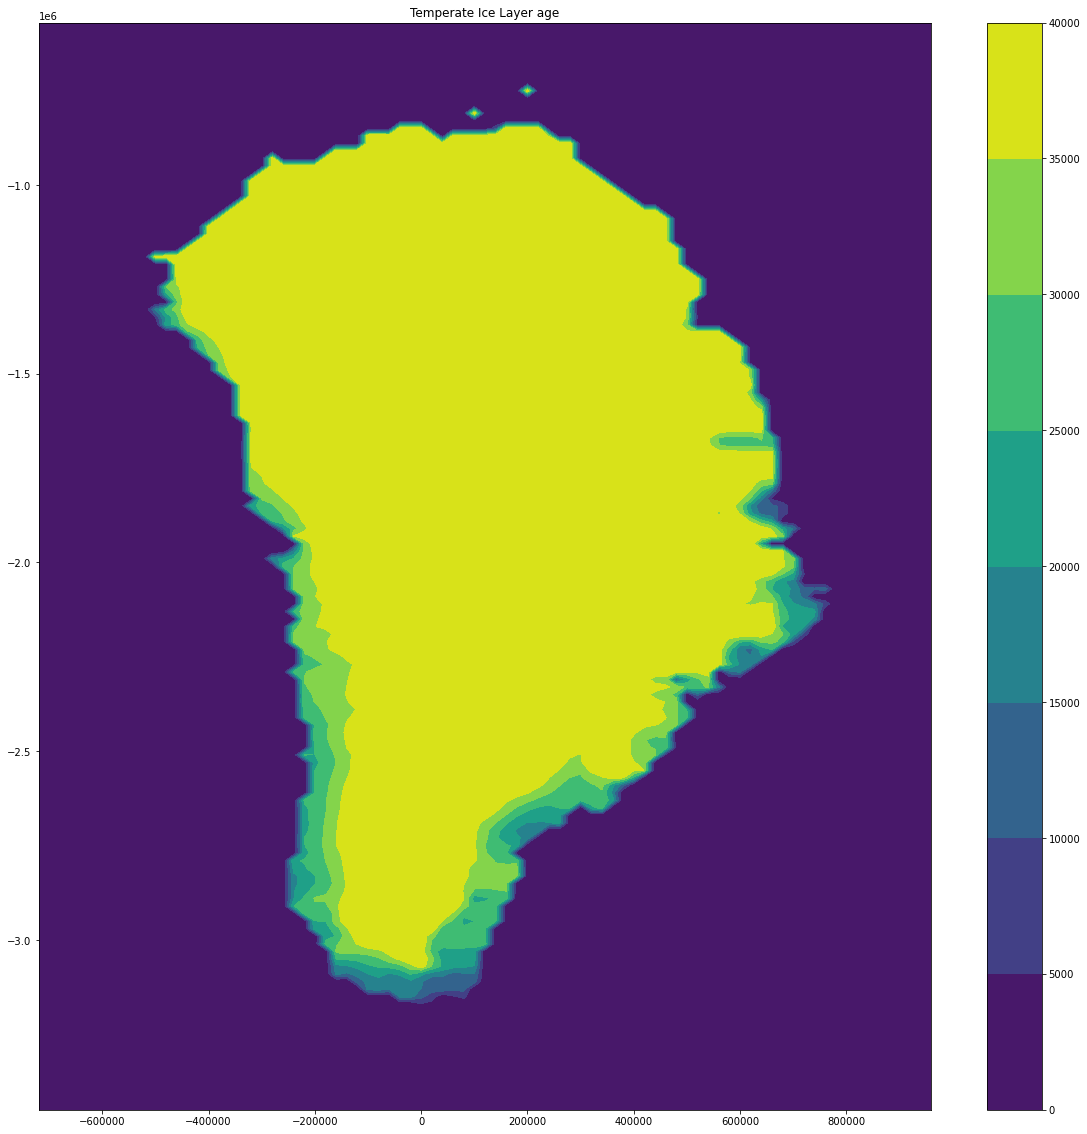

In [63]:
plt.contourf(x,y,age_t[5,:,:])
plt.colorbar()
plt.title("Temperate Ice Layer age")
plt.show()

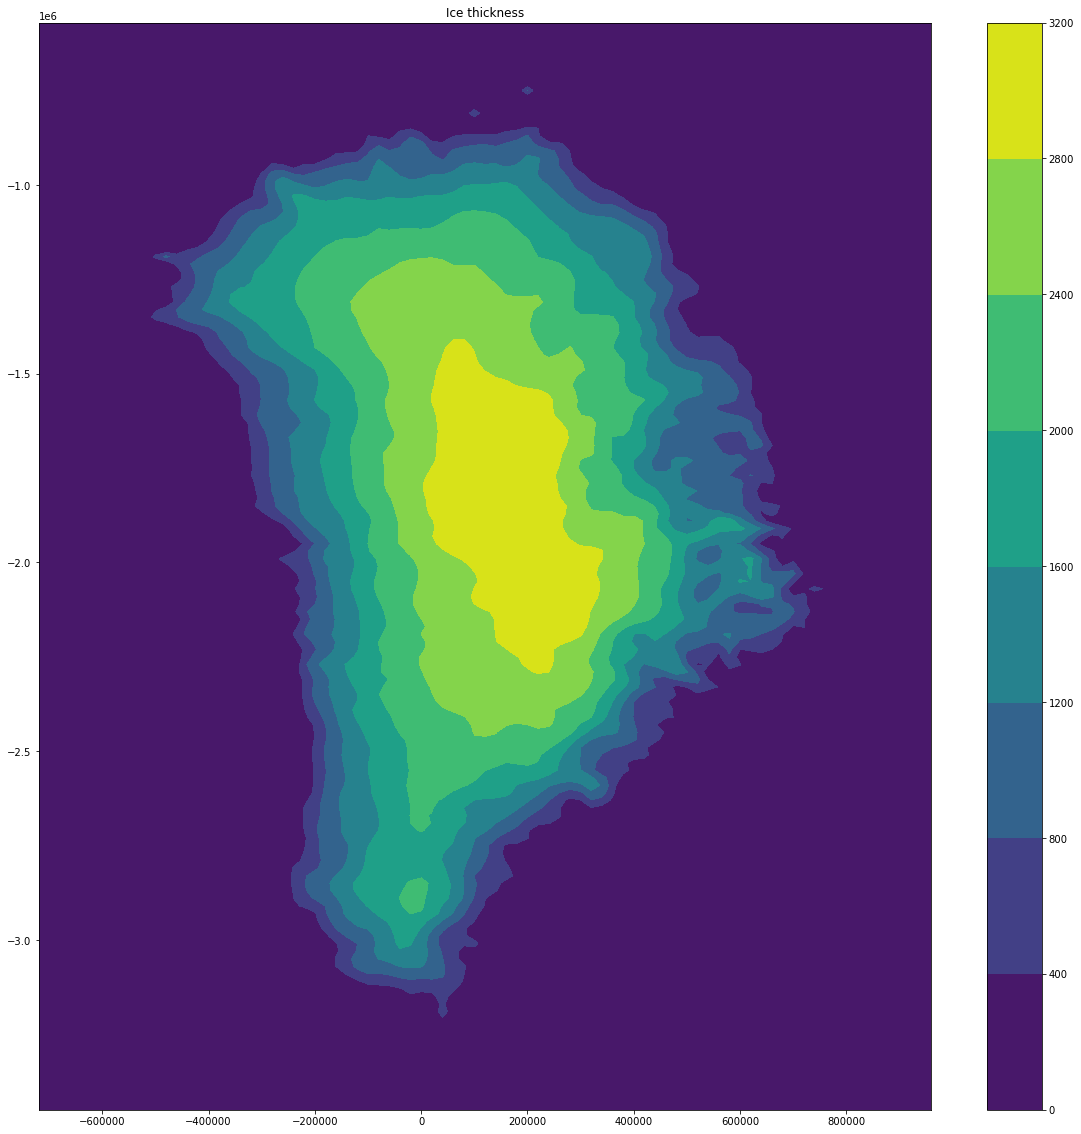

In [64]:
plt.contourf(x,y,H)
plt.colorbar()
plt.title("Ice thickness")
plt.show()

[0. 0. 0. ... 0. 0. 0.]


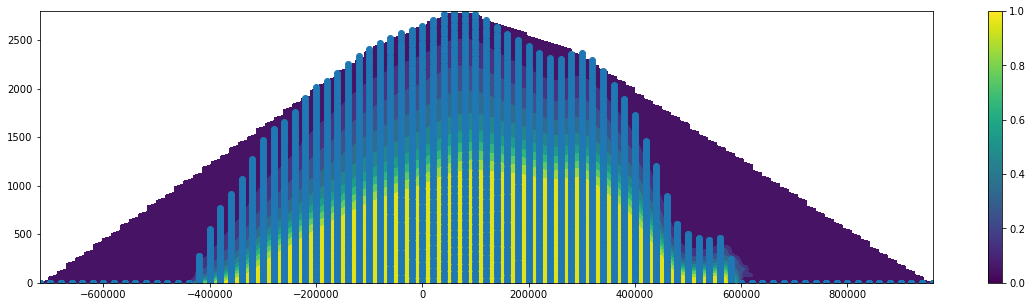

In [65]:
plt.rcParams['figure.figsize'] = [20,5]

### Plot isochrones on a slice running west to east, but scaling according to height in the y-axis
y_index = np.where(y==-1410000)
x_array = np.tile(x, (zeta_c, 1)) 
z_array = np.zeros((zeta_c, x.shape[0]))
age_slice_west_east = age_c[:,y_index[0],:]

for i in range(x.shape[0]):
    for j in range(zeta_c):
        z_array[j,i] = H_cold[y_index[0],i]/(zeta_c-1)*j 


interpolate_and_plot(x_array.reshape(-1), z_array.reshape(-1), age_slice_west_east.reshape(-1), 100, 100)
print(age_slice_west_east.reshape(-1))

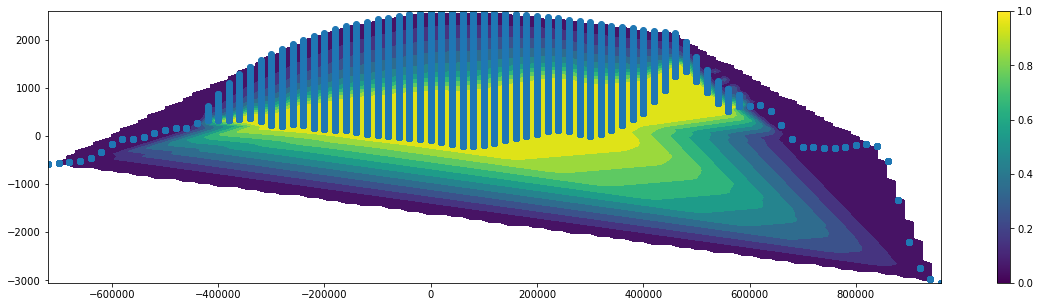

In [66]:
plt.rcParams['figure.figsize'] = [20,5]

### Plot isochrones on a slice running west to east, but scaling according to height in the y-axis
y_index = np.where(y==-1410000)
x_array = np.tile(x, (zeta_c+zeta_t, 1)) 
z_array = np.zeros((zeta_t+zeta_c, x.shape[0]))
age_slice_west_east_cold = age_c[:,y_index[0],:]
age_slice_west_east_temp = age_t[:,y_index[0],:]
age_slice_west_east = np.concatenate((age_slice_west_east_temp,age_slice_west_east_cold), axis = 0)
for i in range(x.shape[0]):
    for j in range(zeta_t):
        z_array[j,i] = zb[y_index[0],i] + H_temp[y_index[0],i]/(zeta_t-1)*j 
    
    for j in range(zeta_t, zeta_t+zeta_c):
        z_array[j,i] = zb[y_index[0],i] + H_temp[y_index[0],i] + H_cold[y_index[0],i]/(zeta_c-1)*(j-zeta_t) 

interpolate_and_plot(x_array.reshape(-1), z_array.reshape(-1), age_slice_west_east.reshape(-1), 100, 100)


[0. 0. 0. ... 0. 0. 0.]


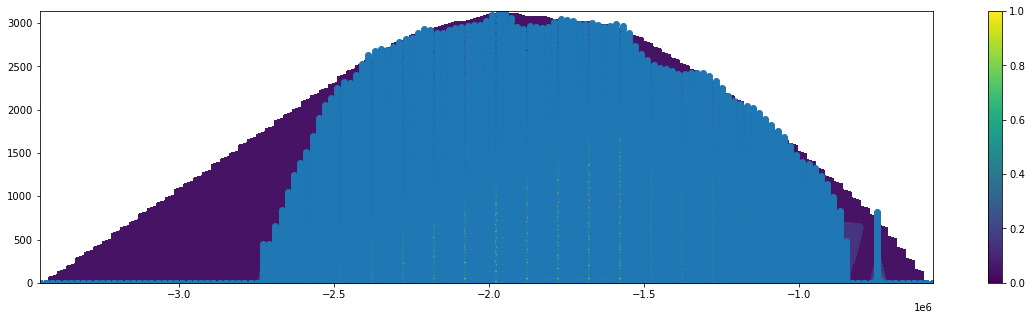

In [67]:
### Plot isochrones on a slice running west to east, but scaling according to height in the y-axis
x_index = np.where(x==200000)
y_array = np.tile(y, (zeta_c, 1)) 
z_array = np.zeros((zeta_c, y.shape[0]))
age_slice_south_north = age_c[:,:,x_index[0]]

for i in range(y.shape[0]):
    for j in range(zeta_c):
        z_array[j,i] = H_cold[i,x_index[0]]/(zeta_c-1)*j 


interpolate_and_plot(y_array.reshape(-1), z_array.reshape(-1), age_slice_south_north.reshape(-1), 100, 100)
print(age_slice_south_north.reshape(-1))

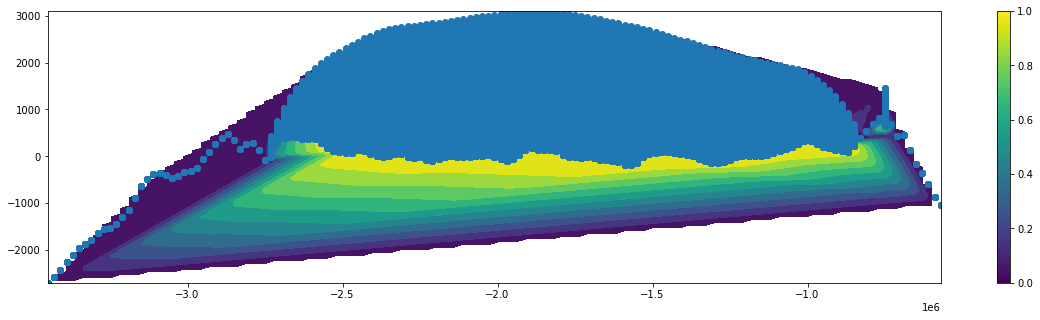

In [68]:
plt.rcParams['figure.figsize'] = [20,5]

### Plot isochrones on a slice running west to east, but scaling according to height in the y-axis
x_index = np.where(x==200000)
y_array = np.tile(y, (zeta_c+zeta_t, 1)) 
z_array = np.zeros((zeta_t+zeta_c, y.shape[0]))
age_slice_south_north_cold = age_c[:,:,x_index[0]]
age_slice_south_north_temp = age_t[:,:,x_index[0]]
age_slice_south_north = np.concatenate((age_slice_south_north_temp,age_slice_south_north_cold), axis = 0)
for i in range(y.shape[0]):
    for j in range(zeta_t):
        z_array[j,i] = zb[i,x_index[0]] + H_temp[i,x_index[0]]/(zeta_t-1)*j 
    
    for j in range(zeta_t, zeta_t+zeta_c):
        z_array[j,i] = zb[i,x_index[0]] + H_temp[i,x_index[0]] + H_cold[i,x_index[0]]/(zeta_c-1)*(j-zeta_t) 

interpolate_and_plot(y_array.reshape(-1), z_array.reshape(-1), age_slice_south_north.reshape(-1), 100, 100)
